In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf 
from tensorflow.keras.applications import ResNet50V2, DenseNet201, InceptionResNetV2, InceptionV3, Xception, MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping


In [3]:
def train_model(path, train_images=None, train_labels = None, 
                test_images = None, test_labels = None, 
                model_name = None, epochs =50, learning_rate = 0.0001,
                input_shape = (224,224,3), classes=2, batch_size = 16, 
                classifier_activation='softmax',
                callbacks = None):
    '''    
    saves the model as .h5 file\n  
    path = directory for saving the files
    train_images = a numpy array containing the image data for training\n
    train_labels = a numpy array containing the labels for training\n
    test_images = a numpy array containing the image data for test\n
    test_labels = a numpy array containing the labels for test\n
    model_name = a string, name of the model -> "vgg19", "resnet50_v2", "inception_resnet_v2", "densenet201", "inception_v3", "xception", "mobilenet_v2"\n
    epochs\n
    learning_rate\n        
    '''

    base_model = None
    if model_name == 'resnet50_v2':
        base_model = ResNet50V2(weights = None, include_top = False, input_shape = input_shape)
             
    if model_name == 'inception_resnet_v2':        
        base_model = InceptionResNetV2(weights = None, include_top = False, input_shape = input_shape)
    
    if model_name == 'densenet201':        
        base_model = DenseNet201(weights = None, include_top = False, input_shape = input_shape)
          
    if model_name == 'inception_v3':        
        base_model = InceptionV3(weights = None, include_top = False, input_shape = input_shape)
        
    if model_name == 'xception':        
        base_model = Xception(weights = None, include_top = False, input_shape = input_shape)
        
    if model_name == 'mobilenet_v2':        
        base_model = MobileNetV2(weights = None, include_top = False, input_shape = input_shape)

    x = base_model.output         
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    output = tf.keras.layers.Dense(classes, activation=classifier_activation)(x)

    model = tf.keras.Model(inputs = base_model.input, outputs = output)

    optimizer = Adam(learning_rate = learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

    model.compile(optimizer = optimizer,
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics = ['accuracy'])
        
    results = model.fit(train_images, train_labels, epochs = epochs,
                        validation_data = (test_images, test_labels), 
                        batch_size=batch_size, 
                        callbacks = callbacks
                        )
    
    loss = pd.DataFrame(model.history.history['loss'])
    val_loss = pd.DataFrame(model.history.history['val_loss'])
    plt.plot(loss)
    plt.plot(val_loss)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.savefig(path+model_name+'_loss.png')
    plt.show()

    acc = pd.DataFrame(model.history.history['accuracy'])
    val_acc = pd.DataFrame(model.history.history['val_accuracy'])
    plt.plot(acc)
    plt.plot(val_acc)
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.savefig(path+model_name+'_acc.png')
    plt.show()

    save_model = path + model_name + '.h5'
    model.save(save_model)
    
    return results



In [4]:
import numpy as np
import tensorflow as tf
#from Model import *
classes = ["LUNG_CANCER","NOT_LUNG_CANCER"]
image_size = 224

#x_train_path = input("Enter path to train images: ")
#y_train_path = input("Enter path to train labels: ")
#x_test_path = input("Enter path to test images: ")
#y_test_path = input("Enter path to test labels: ")
#path = input("Enter path to save the model: ")  #path to save the model
train_image_path = "/content/drive/MyDrive/MLFPGA/MLFPGA_Proj/DATA/OUTPUT_DIR/New_train_images.npy"
train_labels_path = "/content/drive/MyDrive/MLFPGA/MLFPGA_Proj/DATA/OUTPUT_DIR/New_train_labels.npy"
test_image_path = "/content/drive/MyDrive/MLFPGA/MLFPGA_Proj/DATA/OUTPUT_DIR/New_test_images.npy"
test_labels_path = "/content/drive/MyDrive/MLFPGA/MLFPGA_Proj/DATA/OUTPUT_DIR/New_test_labels.npy"

path = "/content/drive/MyDrive/MLFPGA/MLFPGA_Proj/Model_Data_all_models/"

In [5]:
x_train = np.load(train_image_path)

In [6]:
x_train.shape

(616, 224, 224, 3)

In [7]:
y_train = np.load(train_labels_path)

In [8]:
x_test = np.load(test_image_path)

In [9]:
y_test = np.load(test_labels_path)

In [10]:
#early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=0, 
#                           mode='min', restore_best_weights=True)

#callbacks = [early_stop]

In [15]:
from sklearn.model_selection import train_test_split
x_train_train, x_train_val, y_train_train, y_train_val = train_test_split(x_train, y_train, test_size=0.20, random_state=1)

print(f"Sizes: {x_train_train.shape}, {x_train_val.shape}")

Sizes: (492, 224, 224, 3), (124, 224, 224, 3)


Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


31/31 [==============================] - 10s 163ms/step - loss: 0.2660 - accuracy: 0.9228 - val_loss: 0.6713 - val_accuracy: 0.7581
Epoch 2/50
31/31 [==============================] - 3s 113ms/step - loss: 0.1286 - accuracy: 0.9614 - val_loss: 0.6570 - val_accuracy: 0.7581
Epoch 3/50
31/31 [==============================] - 3s 112ms/step - loss: 0.1327 - accuracy: 0.9553 - val_loss: 0.6386 - val_accuracy: 0.7581
Epoch 4/50
31/31 [==============================] - 4s 132ms/step - loss: 0.0795 - accuracy: 0.9675 - val_loss: 0.6264 - val_accuracy: 0.7581
Epoch 5/50
31/31 [==============================] - 4s 125ms/step - loss: 0.0986 - accuracy: 0.9675 - val_loss: 0.6135 - val_accuracy: 0.7581
Epoch 6/50
31/31 [==============================] - 4s 139ms/step - loss: 0.0698 - accuracy: 0.9898 - val_loss: 0.5962 - val_accuracy: 0.7581
Epoch 7/50
31/31 [==============================] - 4s 133ms/step - loss: 0.0504 - accuracy: 0.9837 - val_loss: 0.5825 - val_accuracy: 0.7581
Epoch 8/50
31/31

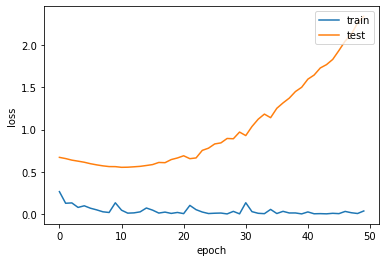

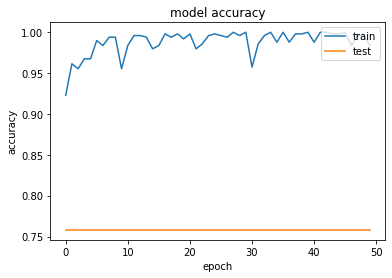

In [16]:
mobilenet_v2 = train_model(path,x_train_train, y_train_train,x_train_val,y_train_val,model_name ='mobilenet_v2',epochs=epochs,input_shape=(image_size,image_size,3),classes = len(classes))

Epoch 1/50
31/31 [==============================] - 19s 413ms/step - loss: 0.2499 - accuracy: 0.9146 - val_loss: 0.6676 - val_accuracy: 0.7581
Epoch 2/50
31/31 [==============================] - 10s 327ms/step - loss: 0.0600 - accuracy: 0.9797 - val_loss: 0.6452 - val_accuracy: 0.7581
Epoch 3/50
31/31 [==============================] - 10s 330ms/step - loss: 0.0372 - accuracy: 0.9939 - val_loss: 0.6222 - val_accuracy: 0.7581
Epoch 4/50
31/31 [==============================] - 10s 336ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.5992 - val_accuracy: 0.7581
Epoch 5/50
31/31 [==============================] - 10s 326ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.5789 - val_accuracy: 0.7581
Epoch 6/50
31/31 [==============================] - 10s 321ms/step - loss: 9.6528e-04 - accuracy: 1.0000 - val_loss: 0.5631 - val_accuracy: 0.7581
Epoch 7/50
31/31 [==============================] - 10s 323ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.5541 - val_accuracy: 0.

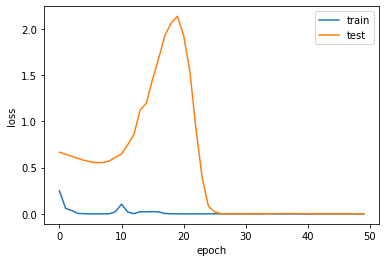

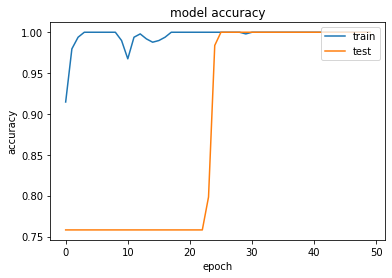

In [18]:
xception = train_model(path, x_train_train, y_train_train,
                     x_train_val, y_train_val, model_name="xception",
                     epochs=epochs, input_shape = (image_size,image_size,3),
                     classes = len(classes))

Epoch 1/50
31/31 [==============================] - 43s 599ms/step - loss: 0.2867 - accuracy: 0.9126 - val_loss: 0.5590 - val_accuracy: 0.7581
Epoch 2/50
31/31 [==============================] - 10s 316ms/step - loss: 0.1373 - accuracy: 0.9533 - val_loss: 0.8066 - val_accuracy: 0.7581
Epoch 3/50
31/31 [==============================] - 10s 322ms/step - loss: 0.1119 - accuracy: 0.9736 - val_loss: 1.0763 - val_accuracy: 0.7581
Epoch 4/50
31/31 [==============================] - 10s 319ms/step - loss: 0.0997 - accuracy: 0.9614 - val_loss: 1.0536 - val_accuracy: 0.7581
Epoch 5/50
31/31 [==============================] - 10s 319ms/step - loss: 0.0878 - accuracy: 0.9654 - val_loss: 1.1048 - val_accuracy: 0.7581
Epoch 6/50
31/31 [==============================] - 10s 316ms/step - loss: 0.0700 - accuracy: 0.9756 - val_loss: 1.3661 - val_accuracy: 0.7581
Epoch 7/50
31/31 [==============================] - 10s 316ms/step - loss: 0.0819 - accuracy: 0.9715 - val_loss: 1.7957 - val_accuracy: 0.7581

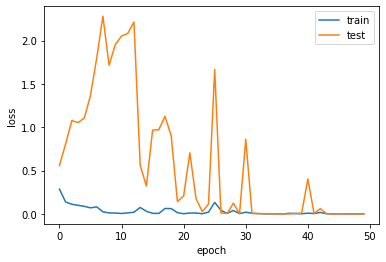

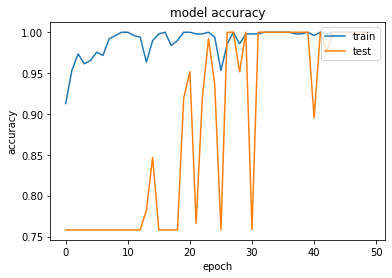

In [19]:
densenet = train_model(path, x_train_train, y_train_train,
                       x_train_val, y_train_val, model_name="densenet201",
                       epochs=epochs, input_shape = (image_size,image_size,3),
                       classes = len(classes))


Epoch 1/50
31/31 [==============================] - 13s 208ms/step - loss: 0.3153 - accuracy: 0.9085 - val_loss: 0.6952 - val_accuracy: 0.7581
Epoch 2/50
31/31 [==============================] - 5s 167ms/step - loss: 0.2151 - accuracy: 0.9329 - val_loss: 1.2660 - val_accuracy: 0.7581
Epoch 3/50
31/31 [==============================] - 5s 168ms/step - loss: 0.1163 - accuracy: 0.9817 - val_loss: 1.8692 - val_accuracy: 0.7581
Epoch 4/50
31/31 [==============================] - 5s 169ms/step - loss: 0.0977 - accuracy: 0.9736 - val_loss: 2.1407 - val_accuracy: 0.7581
Epoch 5/50
31/31 [==============================] - 5s 168ms/step - loss: 0.0410 - accuracy: 0.9878 - val_loss: 2.6106 - val_accuracy: 0.7581
Epoch 6/50
31/31 [==============================] - 6s 178ms/step - loss: 0.0185 - accuracy: 0.9919 - val_loss: 2.7579 - val_accuracy: 0.7581
Epoch 7/50
31/31 [==============================] - 5s 171ms/step - loss: 0.0320 - accuracy: 0.9878 - val_loss: 3.3604 - val_accuracy: 0.7581
Epoch

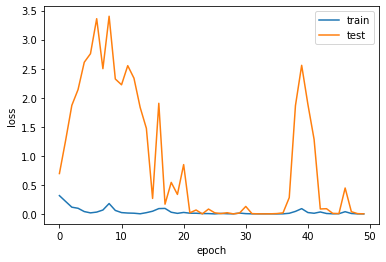

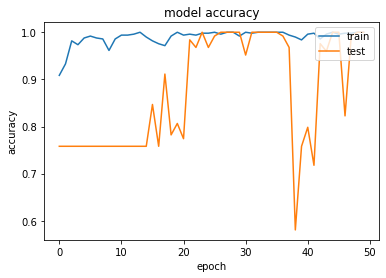

In [20]:
resnet = train_model(path, x_train_train, y_train_train,
                     x_train_val, y_train_val, model_name="resnet50_v2",
                     epochs=epochs, input_shape = (image_size,image_size,3),
                     classes = len(classes))
#callbacks = callbacks

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


31/31 [==============================] - 18s 291ms/step - loss: 0.2363 - accuracy: 0.9248 - val_loss: 0.5963 - val_accuracy: 0.7581
Epoch 2/50
31/31 [==============================] - 5s 146ms/step - loss: 0.1296 - accuracy: 0.9370 - val_loss: 1.1475 - val_accuracy: 0.7581
Epoch 3/50
31/31 [==============================] - 5s 153ms/step - loss: 0.2394 - accuracy: 0.9411 - val_loss: 1.9581 - val_accuracy: 0.7581
Epoch 4/50
31/31 [==============================] - 5s 146ms/step - loss: 0.1094 - accuracy: 0.9492 - val_loss: 1.9313 - val_accuracy: 0.7581
Epoch 5/50
31/31 [==============================] - 5s 152ms/step - loss: 0.0446 - accuracy: 0.9898 - val_loss: 2.0547 - val_accuracy: 0.7581
Epoch 6/50
31/31 [==============================] - 4s 143ms/step - loss: 0.0710 - accuracy: 0.9858 - val_loss: 2.9367 - val_accuracy: 0.7581
Epoch 7/50
31/31 [==============================] - 5s 148ms/step - loss: 0.0430 - accuracy: 0.9837 - val_loss: 2.6981 - val_accuracy: 0.7581
Epoch 8/50
31/31

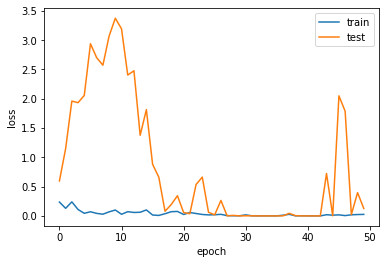

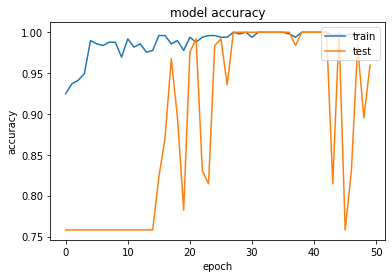

In [22]:
inception_v3 = train_model(path, x_train_train, y_train_train,
                     x_train_val, y_train_val, model_name="inception_v3",
                     epochs=epochs, input_shape = (image_size,image_size,3),
                     classes = len(classes))

In [25]:
# Evaluate model
x_test_path = '/content/drive/MyDrive/MLFPGA/MLFPGA_Proj/DATA/OUTPUT_DIR/New_test_images.npy'
y_test_path = '/content/drive/MyDrive/MLFPGA/MLFPGA_Proj/DATA/OUTPUT_DIR/New_test_labels.npy'
inception_path = '/content/drive/MyDrive/MLFPGA/MLFPGA_Proj/Model_Data_all_models/inception_v3.h5'
resnet_path = '/content/drive/MyDrive/MLFPGA/MLFPGA_Proj/Model_Data_all_models/resnet50_v2.h5'
densenet_path = '/content/drive/MyDrive/MLFPGA/MLFPGA_Proj/Model_Data_all_models/densenet201.h5'
mobilenet_path = '/content/drive/MyDrive/MLFPGA/MLFPGA_Proj/Model_Data_all_models/mobilenet_v2.h5'
xception_path = '/content/drive/MyDrive/MLFPGA/MLFPGA_Proj/Model_Data_all_models/xception.h5'

x_test = np.load(x_test_path)
y_test = np.load(y_test_path)

image_size = 224

inception_model = tf.keras.models.load_model(inception_path)
resnet_model = tf.keras.models.load_model(resnet_path)
densenet_model = tf.keras.models.load_model(densenet_path)
xception_model = tf.keras.models.load_model(xception_path)
mobilenet_model = tf.keras.models.load_model(mobilenet_path)

models = [densenet_model,resnet_model,mobilenet_model,xception_model, inception_model]

for model in models:
    model_eval = model.evaluate(x_test, y_test)
    print(model, model_eval)

9/9 [==============================] - 4s 141ms/step - loss: 0.0388 - accuracy: 0.9892
<keras.engine.functional.Functional object at 0x7fa6834941d0> [0.038762155920267105, 0.9892086386680603]
9/9 [==============================] - 2s 89ms/step - loss: 0.1246 - accuracy: 0.9424
<keras.engine.functional.Functional object at 0x7fa6832371d0> [0.12458285689353943, 0.9424460530281067]
9/9 [==============================] - 1s 43ms/step - loss: 1.8786 - accuracy: 0.8058
<keras.engine.functional.Functional object at 0x7faa7420e590> [1.878584384918213, 0.8057553768157959]
9/9 [==============================] - 2s 121ms/step - loss: 0.0212 - accuracy: 0.9856
<keras.engine.functional.Functional object at 0x7fa683b6d050> [0.021249903365969658, 0.9856114983558655]
9/9 [==============================] - 3s 78ms/step - loss: 0.2151 - accuracy: 0.9317
<keras.engine.functional.Functional object at 0x7fa6834e6d10> [0.21506035327911377, 0.931654691696167]
